In [271]:

import pandas as pd
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [272]:
df = pd.read_csv('Resources/uswhites.csv')
df.head()

,ID,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,4,14.1,White,US,This white has an expert level of intensity an...,Dutton Ranch Walker Hill Vineyard,50.0,94,California,Sonoma,Green Valley,Dutton-Goldfield 2016 Dutton Ranch Walker Hill...,https://www.winemag.com/buying-guide/dutton-go...,Chardonnay,2016,Dutton-Goldfield
1,39,12.6,White,US,"Stunning aromatics combine spicy citrus, tangy...",Maresh Vineyard Old Vine,30.0,94,Oregon,Willamette Valley,Dundee Hills,Harper Voit 2016 Maresh Vineyard Old Vine Ries...,https://www.winemag.com/buying-guide/harper-vo...,Riesling,2016,Harper Voit
2,53,13.8,White,US,"This is a structured and remarkable wine, burs...",Year of the Monkey Single Vineyard,60.0,94,California,Napa-Sonoma,Carneros,Donum 2016 Year of the Monkey Single Vineyard ...,https://www.winemag.com/buying-guide/donum-201...,Chardonnay,2016,Donum
3,56,13.8,White,US,The wine's aromas are arresting in notes of le...,Chaleur Blanc,35.0,94,Washington,Columbia Valley,Columbia Valley (WA),DeLille 2017 Chaleur Blanc White (Columbia Val...,https://www.winemag.com/buying-guide/delille-2...,Bordeaux-style White Blend,2017,DeLille
4,74,14.7,White,US,"This is a grainy, structured and textured whit...",Lewis MacGregor Estate Vineyard,65.0,94,California,Sonoma,Russian River Valley,Williams Selyem 2016 Lewis MacGregor Estate Vi...,https://www.winemag.com/buying-guide/williams-...,Chardonnay,2016,Williams Selyem


In [273]:
df = df.drop(['ID', 'category', 'country', 'description', 'designation', 'subsubregion', 'title', 'url', 'winery'], axis=1)
df.head()


,alcohol,price,rating,region,subregion,varietal,vintage
0,14.1,50.0,94,California,Sonoma,Chardonnay,2016
1,12.6,30.0,94,Oregon,Willamette Valley,Riesling,2016
2,13.8,60.0,94,California,Napa-Sonoma,Chardonnay,2016
3,13.8,35.0,94,Washington,Columbia Valley,Bordeaux-style White Blend,2017
4,14.7,65.0,94,California,Sonoma,Chardonnay,2016


In [274]:
X_df = pd.DataFrame(df)
X_df['subregion'] = X_df['subregion'].astype(str)
X_df['vintage'] = X_df['vintage'].astype(int)

In [275]:
X = X_df.drop("price", axis=1)
y = df["price"]

In [276]:
X= X.apply(LabelEncoder().fit_transform)
X

,alcohol,rating,region,subregion,varietal,vintage
0,130,14,2,42,17,22
1,68,14,17,56,87,22
2,118,14,2,28,17,22
3,118,14,24,7,10,23
4,152,14,2,42,17,22
...,...,...,...,...,...,...
23653,147,11,2,3,17,11
23654,147,12,2,3,17,11
23655,159,12,2,3,17,11
23656,176,12,2,42,138,10


In [277]:
X = X.values.astype("float32")
print(X)
y = y.values.astype("float32")
print(y)

[[130.  14.   2.  42.  17.  22.]
 [ 68.  14.  17.  56.  87.  22.]
 [118.  14.   2.  28.  17.  22.]
 ...
 [159.  12.   2.   3.  17.  11.]
 [176.  12.   2.  42. 138.  10.]
 [139.  12.   2.   2.  17.  11.]]
[50. 30. 60. ... 29. 24. 55.]


In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
print(y_test.shape)
print(X_test.shape)

(5915,)
(5915, 6)


In [281]:
scaler_model = StandardScaler()

In [282]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [283]:
X_scaler = scaler_model.fit(X_train)

In [284]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [285]:
input_dims = X_train.shape[1]
input_dims

6

In [286]:
model = Sequential()
model.add(Dense(12, activation = 'relu', name='dense_1', kernel_initializer='random_uniform', input_dim=(input_dims)))
model.add(Dense(8, activation='relu', name='dense_2', kernel_initializer='random_uniform'))
model.add(Dense(1, activation='linear', name='predictions'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
predictions (Dense)          (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [295]:
import numpy as np

In [296]:
from numpy import sqrt,asarray
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=10,  verbose=1, validation_split=0.2)


Train on 14194 samples, validate on 3549 samples
Epoch 1/1000
14194/14194 [==============================] - 1s 104us/step - loss: 89.6385 - mse: 89.6385 - mae: 6.6026 - val_loss: 84.6232 - val_mse: 84.6232 - val_mae: 6.5394
Epoch 2/1000
14194/14194 [==============================] - 1s 80us/step - loss: 89.5536 - mse: 89.5536 - mae: 6.5980 - val_loss: 84.4986 - val_mse: 84.4986 - val_mae: 6.5536
Epoch 3/1000
14194/14194 [==============================] - 1s 79us/step - loss: 89.4734 - mse: 89.4734 - mae: 6.5989 - val_loss: 85.8070 - val_mse: 85.8070 - val_mae: 6.7018
Epoch 4/1000
14194/14194 [==============================] - 1s 85us/step - loss: 89.5732 - mse: 89.5732 - mae: 6.6052 - val_loss: 84.3683 - val_mse: 84.3682 - val_mae: 6.6043
Epoch 5/1000
14194/14194 [==============================] - 1s 83us/step - loss: 89.5058 - mse: 89.5058 - mae: 6.5996 - val_loss: 84.3797 - val_mse: 84.3798 - val_mae: 6.5839
Epoch 6/1000
14194/14194 [==============================] - 1s 90us/step - 

In [297]:
error = model.evaluate(X_test_scaled, y_test, verbose=2)
# print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
print(error, sqrt(error))

[82.49384114127591, 82.49384307861328, 6.554439067840576] [9.08261202 9.08261213 2.56016388]


In [298]:
model.save('model7b.h5')

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


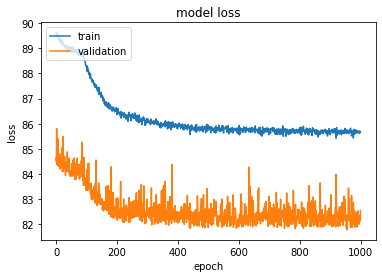

In [299]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [300]:
# from collections import defaultdict
# d = defaultdict(LabelEncoder)

# labeled_df = X_df.apply(lambda x: d[x.name].fit_transform(x))
# labeled_df
# labeled_df.apply(lambda x: d[x.name].inverse_transform(x))

In [305]:
test = np.expand_dims(X_test_scaled[0], axis=0)

In [306]:
print(f"Predicted price: {model.predict(test)}")

Predicted price: [[35.14664]]
